In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as cPickle
import gzip

data = gzip.open("mnist.pkl.gz")
train_data,  validation_data, test_data = cPickle.load(data,encoding="latin1")
X=train_data[0]
X=X.T
Y=train_data[1]
Y=Y.T
print(X.shape)
print(Y.shape)
Y=Y.reshape(1,Y.shape[0])
print(Y.shape)
Y=np.squeeze(Y)
n_Y=np.max(Y)+1
y=np.eye(n_Y)[Y]
Y=y.T
print(Y.shape)
print(np.argmax(Y,axis=0))

(784, 50000)
(50000,)
(1, 50000)
(10, 50000)
[5 0 4 ..., 8 4 8]


In [2]:
def softmax(z):
    cache=z
    t=np.exp(z)
    q=np.sum(t,axis=0,keepdims=True)
    a=np.divide(t,q)
    return a,cache

In [3]:
def tanh(z):
    cache=z
    a=np.tanh(z)
    return a,cache

In [4]:
def initialise_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims) 
    for l in range(1,L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
    
    return parameters

In [5]:
layer_dims=[X.shape[0],125,Y.shape[0]]
parameters=initialise_parameters(layer_dims)
print(parameters["W1"].shape)
print(parameters["b1"].shape)
print(parameters["W2"].shape)
print(parameters["b2"].shape)

(125, 784)
(125, 1)
(10, 125)
(10, 1)


In [6]:
def forward_prop(X,parameters):
    cache={}
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    Z1=np.dot(W1,X)+b1
    A1,cache["Z1"]=tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2,cache["Z2"]=softmax(Z2)
    cache["A1"]=A1
    return A2,cache


In [7]:
def compute_cost(A2,Y):
    m=Y.shape[1]
    cost=-1/m*np.sum(np.multiply(Y,np.log(A2)))
    cost=np.squeeze(cost)
    return cost

In [8]:
def back_prop(X,Y,cache,parameters,A2):
    Z1=cache['Z1']
    A1=cache['A1']
    W2=parameters['W2']
    grads={}
    m=Y.shape[1]
    dZ2=A2-Y
    dW2=1/m*np.dot(dZ2,A1.T)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.multiply(np.matmul(W2.T,dZ2),(1-np.power(np.tanh(Z1),2)))
    dW1=1/m*np.matmul(dZ1,X.T)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)
    grads={'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [9]:
def update_parameters(parameters,grads,learning_rate):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    dW1=grads["dW1"]
    dW2=grads["dW2"]
    db1=grads["db1"]
    db2=grads["db2"]
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    parameters={'W1':W1,'W2':W2,'b1':b1,'b2':b2}
    return parameters

In [10]:
def accuracy(X,parameters,Y):
    Q=np.argmax(Y,axis=0)
    R,_=forward_prop(X,parameters)
    R=np.argmax(R,axis=0)
    count=0
    for i in range(Y.shape[1]):
        if Q[i]==R[i]:
            count+=1
    accuracy=count/Y.shape[1]*100
    return accuracy

In [11]:
def model(X,Y,layer_dims,num_iterations,learning_rate):
    costs=[]
    acc =[]
    parameters=initialise_parameters(layer_dims)
    for i in range(num_iterations):
        A2,cache=forward_prop(X,parameters)
        cost=compute_cost(A2,Y)
        grads=back_prop(X,Y,cache,parameters,A2)
        acc.append(accuracy(X,parameters,Y))
        parameters=update_parameters(parameters,grads,learning_rate)
        costs.append(cost)
        if i % 100 == 0:
            print("After iteration %i cost: %f and accuracy:%f" %(i,cost,accuracy(X,parameters,Y)))
    
    return parameters,costs,acc       

In [12]:
parameters,costs,accuracies=model(X,Y,layer_dims,num_iterations=1500,learning_rate=0.3)

After iteration 0 cost: 2.303553 and accuracy:28.328000
After iteration 100 cost: 0.422131 and accuracy:88.662000
After iteration 200 cost: 0.328504 and accuracy:90.702000
After iteration 300 cost: 0.291378 and accuracy:91.720000
After iteration 400 cost: 0.265887 and accuracy:92.424000
After iteration 500 cost: 0.244653 and accuracy:93.062000
After iteration 600 cost: 0.225826 and accuracy:93.588000
After iteration 700 cost: 0.209003 and accuracy:94.048000
After iteration 800 cost: 0.194101 and accuracy:94.488000
After iteration 900 cost: 0.180987 and accuracy:94.848000
After iteration 1000 cost: 0.169440 and accuracy:95.176000
After iteration 1100 cost: 0.159218 and accuracy:95.454000
After iteration 1200 cost: 0.150106 and accuracy:95.720000
After iteration 1300 cost: 0.141927 and accuracy:95.948000
After iteration 1400 cost: 0.134540 and accuracy:96.162000


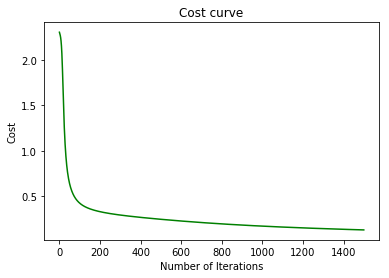

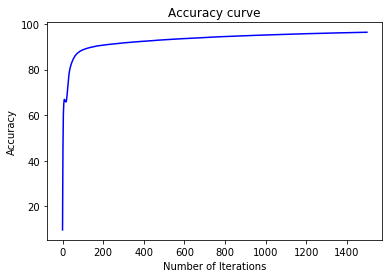

In [13]:
plt.plot(costs,color="green")
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost curve')
plt.show()
plt.plot(accuracies,color="blue")
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')
plt.show()

In [15]:
train_accuracy=accuracy(X,parameters,Y)

In [16]:
print("Final Accuracy on training set :",train_accuracy,"%")    

Final Accuracy on training set : 96.366 %


In [17]:
X_test = test_data[0]
X_test = X_test.T
Y_test=test_data[1]
Y_test=Y_test.T
Y_test=Y_test.reshape(1,Y_test.shape[0])
print(Y_test.shape)
Y_test=np.squeeze(Y_test)
n_Y=np.max(Y_test)+1
y=np.eye(n_Y)[Y_test]
Y_test=y.T
print(Y_test.shape)
print(np.argmax(Y_test,axis=0))

(1, 10000)
(10, 10000)
[7 2 1 ..., 4 5 6]


In [19]:
test_accuracy=accuracy(X_test,parameters,Y_test)
print("Accuracy on Test set : ",test_accuracy,"%")

Accuracy on Test set :  95.99 %


In [21]:
def predict(X,parameters):
    A,_=forward_prop(X,parameters)
    A=np.argmax(A,axis=0)
    return A

It is a  2


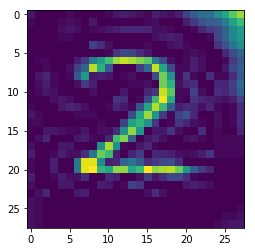

In [22]:
import scipy
from scipy import ndimage
from PIL import Image
img = Image.open('2.jpg').convert('L')
img.save('greyscale-2.png')
fname="greyscale-2.png"
image = np.array(ndimage.imread(fname, flatten=False))
#print(image.shape)
image = scipy.misc.imresize(image, size=(28,28)).reshape((28*28,1))
#print(image.shape)
c=predict(image,parameters)
print("It is a ",np.squeeze(c))
plt.imshow(img)
plt.show()

It is a  0


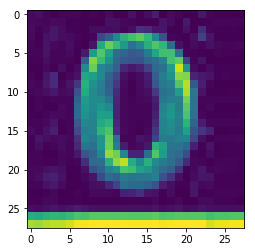

In [23]:
img = Image.open('0(1).jpg').convert('L')
img.save('greyscale-01.png')
fname="greyscale-01.png"
image = np.array(ndimage.imread(fname, flatten=False))
#print(image.shape)
image = scipy.misc.imresize(image, size=(28,28)).reshape((28*28,1))
#print(image.shape)
c=predict(image,parameters)
print("It is a ",np.squeeze(c))
plt.imshow(img)
plt.show()